<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/05_Transfer_Learning_in_TensorFlow_Part_2_Fine_tuning_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 **05. Transfer Learning in TensorFlow Part 2: Fine-tuning Exercises**

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.


---

---

## **0. Importing Dependencies and getting the helper function**

### Importing important Packages

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

### Download helper function and loading it

In [2]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py

from helper_function import *

--2024-02-01 07:32:43--  https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8898 (8.7K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   8.69K  --.-KB/s    in 0s      

2024-02-01 07:32:44 (74.0 MB/s) - ‘helper_function.py’ saved [8898/8898]



### Getting dataset and extract it.

In [3]:
path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip', extract=True)[:-4]
path

168546183/168546183 [==============================] - 8s 0us/step


'/root/.keras/datasets/10_food_classes_10_percent'

### Walk through the folder path

In [58]:
walk_through_directory(path)

There are 2 folders and 0 in this '/root/.keras/datasets/10_food_classes_10_percent' directory path.
There are 10 folders and 0 in this '/root/.keras/datasets/10_food_classes_10_percent/train' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/hamburger' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/fried_rice' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/steak' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/grilled_salmon' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/ramen' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/train/pizza' directory path.
There are 0 folders and 75 in this '/root/.keras/datasets/10_food_classes_10_percent/trai

### Setting the paths of train and test dataset

In [4]:
train_dir = path + '/train/'
test_dir = path + '/test/'

### Data Preprocssing

In [5]:
IMG_SIZE = (224, 224)

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         image_size=IMG_SIZE,
                                                         label_mode='categorical')

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
len(train_data), len(test_data)

(24, 79)

In [7]:
for image, label in train_data.take(1):
  print(image.shape, label.shape)

(32, 224, 224, 3) (32, 10)


---

---

## **1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.**

### Since there is no scaling layer in Mobilenet_v2, we have to scale manually

In [8]:
data_rescaling = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1/255.)
])

### Creating Base Model

In [9]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                            input_shape=IMG_SHAPE)

base_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


### Creating the model

In [10]:
inputs = tf.keras.Input(shape=IMG_SHAPE, name='Input_layer')

x = data_rescaling(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='Output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.0

In [21]:
for i, layer in enumerate(model_0.layers):
  print(i, layer.name, layer.trainable)

0 Input_layer True
1 sequential True
2 mobilenetv2_1.00_224 False
3 global_average_pooling2d True
4 Output_layer True


In [22]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

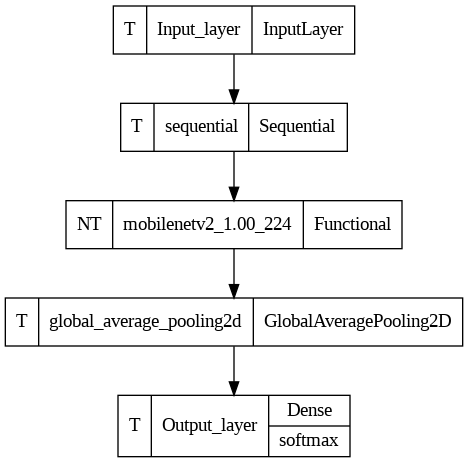

In [12]:
tf.keras.utils.plot_model(model_0, show_layer_activations=True, show_trainable=True)

### Compiling the model

In [13]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

### Fit the model

In [14]:
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='10_epoch_10_per_data'),
                                   tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                              experiment_name='10_epoch_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/10_epoch_10_per_data/20240201-073349
Path of the checkpoint: ModelCheckpoint/10_epoch_10_per_data/20240201-073349
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.0215 - accuracy: 0.3173
Epoch 1: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-073349
24/24 [==============================] - 12s 258ms/step - loss: 2.0215 - accuracy: 0.3173 - val_loss: 1.4362 - val_accuracy: 0.5422
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.1387 - accuracy: 0.6399
Epoch 2: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-073349
24/24 [==============================] - 4s 137ms/step - loss: 1.1383 - accuracy: 0.6400 - val_loss: 0.9702 - val_accuracy: 0.6844
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7983 - accuracy: 0.7772
Epoch 3: saving model to ModelCheckpoint/10_epoch_10_per_data/20240201-073349
24/24 [==============================] - 5s 184ms/step - lo

In [15]:
tensorboard_path = 'Tensorboard/10_epoch_10_per_data/20240201-073349'
modelcheckpoint_path = 'ModelCheckpoint/10_epoch_10_per_data/20240201-073349'

### Evaluate the model

In [16]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 0.6550 - accuracy: 0.7768


[0.6549739837646484, 0.7767999768257141]

### Plot loss and accuracy curve

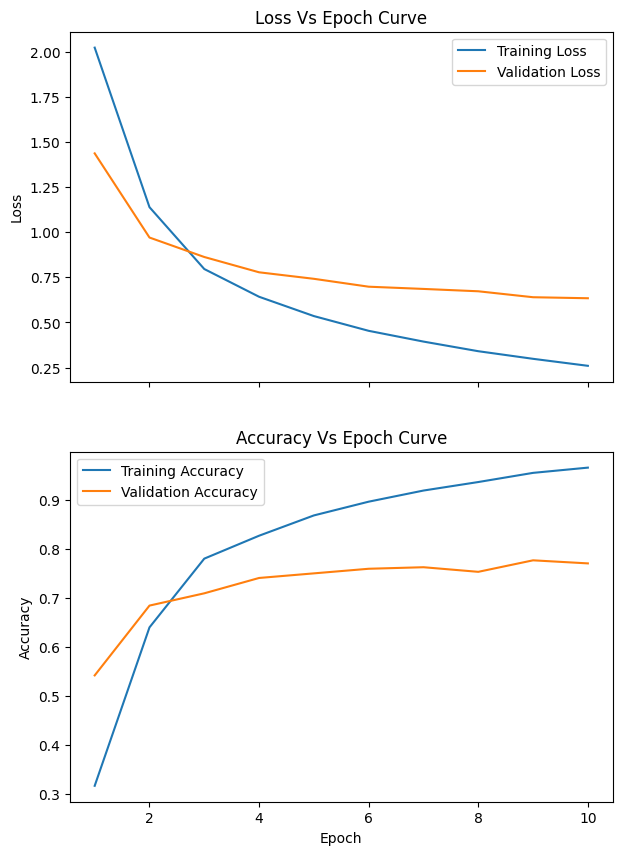

In [17]:
plot_loss_accuracy_curve(history_0)

---

---

## **2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Change the base model layers trainable to `True`

In [26]:
base_model.trainable = True

In [27]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 True
1 Conv1 True
2 bn_Conv1 True
3 Conv1_relu True
4 expanded_conv_depthwise True
5 expanded_conv_depthwise_BN True
6 expanded_conv_depthwise_relu True
7 expanded_conv_project True
8 expanded_conv_project_BN True
9 block_1_expand True
10 block_1_expand_BN True
11 block_1_expand_relu True
12 block_1_pad True
13 block_1_depthwise True
14 block_1_depthwise_BN True
15 block_1_depthwise_relu True
16 block_1_project True
17 block_1_project_BN True
18 block_2_expand True
19 block_2_expand_BN True
20 block_2_expand_relu True
21 block_2_depthwise True
22 block_2_depthwise_BN True
23 block_2_depthwise_relu True
24 block_2_project True
25 block_2_project_BN True
26 block_2_add True
27 block_3_expand True
28 block_3_expand_BN True
29 block_3_expand_relu True
30 block_3_pad True
31 block_3_depthwise True
32 block_3_depthwise_BN True
33 block_3_depthwise_relu True
34 block_3_project True
35 block_3_project_BN True
36 block_4_expand True
37 block_4_expand_BN True
38 block_4_expand_relu Tru

In [28]:
print(len(base_model.layers))

154


### Change all base_model all layers trainable to False except last 20 layers

In [29]:
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [31]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

### Create another model same as (Model - 0)

In [32]:
model_1 = tf.keras.models.clone_model(model_0)

### Compile the model (Model - 1)

In [33]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [34]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 1218890 (4.

### Load the weights of model - 0 to model - 1

In [35]:
model_1.load_weights(modelcheckpoint_path)

### Comparing the evaluation of Model - 0 and Model - 1

In [36]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 63ms/step - loss: 0.6550 - accuracy: 0.7768


[0.6549739241600037, 0.7767999768257141]

In [37]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.6550 - accuracy: 0.7768


[0.6549738645553589, 0.7767999768257141]

> **Note:** As expected both the models produces same results

### Fit the data with new model (Model - 1)

In [40]:
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='20_epoch_10_per_data'),
                                   tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                              experiment_name='20_epoch_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/20_epoch_10_per_data/20240201-080056
Path of the checkpoint: ModelCheckpoint/20_epoch_10_per_data/20240201-080056
Epoch 10/20
24/24 [==============================] - ETA: 0s - loss: 1.4630 - accuracy: 0.5733
Epoch 10: saving model to ModelCheckpoint/20_epoch_10_per_data/20240201-080056
24/24 [==============================] - 14s 220ms/step - loss: 1.4630 - accuracy: 0.5733 - val_loss: 12.4570 - val_accuracy: 0.3422
Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 0.5559 - accuracy: 0.8370
Epoch 11: saving model to ModelCheckpoint/20_epoch_10_per_data/20240201-080056
24/24 [==============================] - 4s 138ms/step - loss: 0.5590 - accuracy: 0.8373 - val_loss: 16.0162 - val_accuracy: 0.3141
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.3286 - accuracy: 0.8899
Epoch 12: saving model to ModelCheckpoint/20_epoch_10_per_data/20240201-080056
24/24 [==============================] - 7s 303ms/s

### Evaluate the model

In [42]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 11.4368 - accuracy: 0.4088


[11.43675422668457, 0.40880000591278076]

### Compare loss and accuracy curve of model-0 and model-1

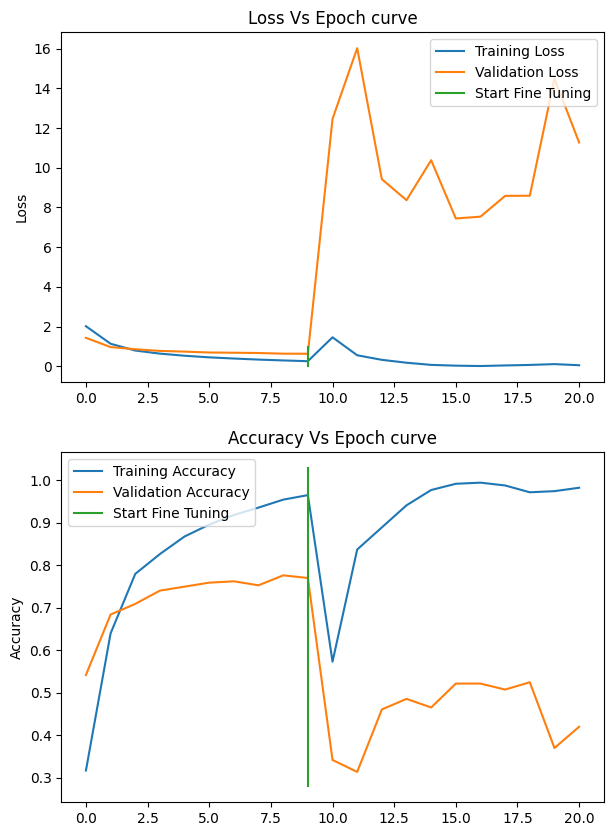

In [43]:
compare_histories(history_0, history_1)

---

---

## **3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?**

### Make base_model trianable to `True` last 30 layers

In [45]:
for i, layer in enumerate(reversed(base_model.layers)):
  print(i, layer.name, layer.trainable)

0 out_relu True
1 Conv_1_bn True
2 Conv_1 True
3 block_16_project_BN True
4 block_16_project True
5 block_16_depthwise_relu True
6 block_16_depthwise_BN True
7 block_16_depthwise True
8 block_16_expand_relu True
9 block_16_expand_BN True
10 block_16_expand True
11 block_15_add True
12 block_15_project_BN True
13 block_15_project True
14 block_15_depthwise_relu True
15 block_15_depthwise_BN True
16 block_15_depthwise True
17 block_15_expand_relu True
18 block_15_expand_BN True
19 block_15_expand True
20 block_14_add False
21 block_14_project_BN False
22 block_14_project False
23 block_14_depthwise_relu False
24 block_14_depthwise_BN False
25 block_14_depthwise False
26 block_14_expand_relu False
27 block_14_expand_BN False
28 block_14_expand False
29 block_13_project_BN False
30 block_13_project False
31 block_13_depthwise_relu False
32 block_13_depthwise_BN False
33 block_13_depthwise False
34 block_13_pad False
35 block_13_expand_relu False
36 block_13_expand_BN False
37 block_13_expa

In [47]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

In [48]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

### Create the model same as (model - 0)

In [49]:
model_2 = tf.keras.models.clone_model(model_0)

In [50]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 1539210 (5.

### Compile the model

In [51]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

### Load the model - 0 weights

In [52]:
model_2.load_weights(modelcheckpoint_path)

### Comparing the evalution on model-2 and model-0

In [53]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 61ms/step - loss: 0.6550 - accuracy: 0.7768


[0.6549738049507141, 0.7767999768257141]

In [54]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 59ms/step - loss: 0.6550 - accuracy: 0.7768


[0.6549738645553589, 0.7767999768257141]

### Fit the model

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=0.25 * len(test_data),
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                         experiment_name='30_trainable_10_per_data'),
                                   tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                              experiment_name='30_trainable_10_per_data')])

Saving the tensorboard callbacks in Tensorboard/30_trainable_10_per_data/20240201-082025
Path of the checkpoint: ModelCheckpoint/30_trainable_10_per_data/20240201-082025
Epoch 10/20
23/24 [===========================>..] - ETA: 0s - loss: 1.6153 - accuracy: 0.5530
Epoch 10: saving model to ModelCheckpoint/30_trainable_10_per_data/20240201-082025
24/24 [==============================] - 12s 188ms/step - loss: 1.6071 - accuracy: 0.5547 - val_loss: 6.5821 - val_accuracy: 0.4141
Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 0.6001 - accuracy: 0.8193
Epoch 11: saving model to ModelCheckpoint/30_trainable_10_per_data/20240201-082025
24/24 [==============================] - 5s 195ms/step - loss: 0.5950 - accuracy: 0.8213 - val_loss: 5.1633 - val_accuracy: 0.4016
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.3172 - accuracy: 0.8927
Epoch 12: saving model to ModelCheckpoint/30_trainable_10_per_data/20240201-082025
24/24 [==========================

### Evaluate the model

In [ ]:
model_2.evaluate(test_data)

### Compare the loss and accuracy curve

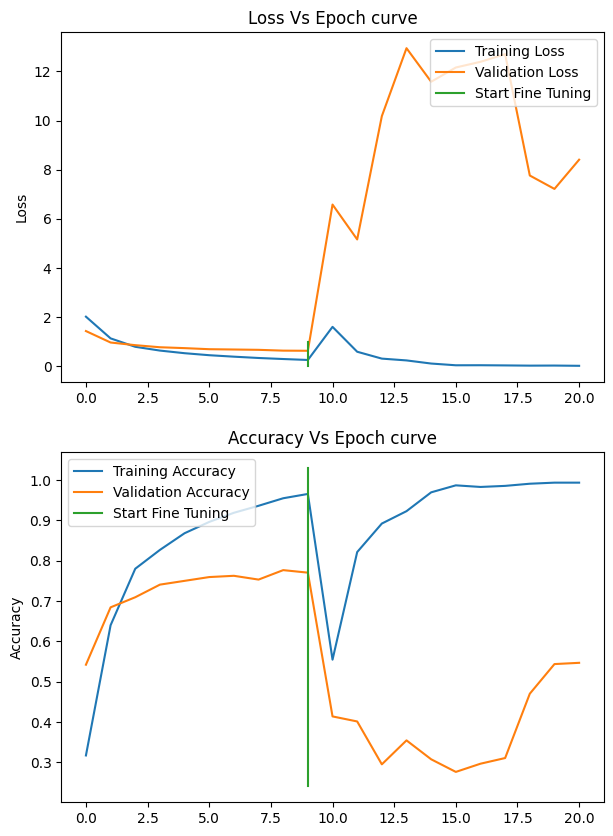

In [56]:
compare_histories(history_0, history_2)

In [57]:
model_0.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Mobilenet_v2.keras')

---

---

## **4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.**

---

---


# **📖 05. Transfer Learning in TensorFlow Part 2: Fine-tuning Extra-curriculum**

* Read the [documentation on data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) in TensorFlow.
* Read the [ULMFit paper](https://arxiv.org/abs/1801.06146) (technical) for an introduction to the concept of freezing and unfreezing different layers.
* Read up on learning rate scheduling (there's a [TensorFlow callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) for this), how could this influence our model training?
  * If you're training for longer, you probably want to reduce the learning rate as you go... the closer you get to the bottom of the hill, the smaller steps you want to take. Imagine it like finding a coin at the bottom of your couch. In the beginning your arm movements are going to be large and the closer you get, the smaller your movements become.
  

---

---